<a href="https://colab.research.google.com/github/AmirHoseinTaherkhani/Python/blob/main/%5CNetworkX%5Cnetworkx_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Assignment:**

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file Employee_Movie_Choices.txt.

A second file, Employee_Relationships.txt, has data on the relationships between different coworkers.

The relationship score has value of -100 (Enemies) to +100 (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

In [2]:
from google.colab import files
uploaded = files.upload()   

Saving Employee_Movie_Choices.txt to Employee_Movie_Choices.txt
Saving Employee_Relationships.txt to Employee_Relationships.txt


In [92]:
import io
df_relationships = pd.read_csv(io.BytesIO(uploaded['Employee_Relationships.txt']), delimiter = "\t", names = ['Emp1', 'Emp2', 'score'])
df_movie_choices = pd.read_csv(io.BytesIO(uploaded['Employee_Movie_Choices.txt']), delimiter = "\t")

In [20]:
# Determining the class of out Bipartite graph
employees = set(df_relationships['#Employee'].unique())
movies = set(df_movie_choices['Movie'].unique())

In [45]:
#Defining a function to visualize graphs
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
   
    plt.figure()
    pos = nx.spring_layout(G) #A dictionary of nodes' positions
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

## **Question 1:**

Using NetworkX, load in the bipartite graph from Employee_Movie_Choices.txt and return that graph.

This function should return a networkx graph with 19 nodes and 24 edges

In [36]:
def create_bipartite():
    G = nx.from_pandas_edgelist(df_movie_choices,'#Employee', 'Movie')
    return G

## **Question 2:**

Using the graph from the previous question, add nodes attributes named 'type' where movies have the value 'movie' and employees have the value 'employee' and return that graph.

This function should return a networkx graph with node attributes {'type': 'movie'} or {'type': 'employee'}

In [43]:
def node_attr():
    G = create_bipartite()
    for node in employees:
        G.add_node(node, type="employee")
    for node in movies:
        G.add_node(node, type="movie")
        return G

## **Question 3:**

Find a weighted projection of the graph from answer_two which tells us how many movies different pairs of employees have in common.

This function should return a weighted projected graph.

In [30]:
def projected_graph():
    from networkx.algorithms import bipartite
    G = node_attr()
    P = bipartite.weighted_projected_graph(G, employees)
    return P

{('Claude', 'Andy'): Text(-0.020177303529688564, -0.47711776256368577, '1'),
 ('Claude', 'Georgia'): Text(-0.08032964015422642, -0.8693924264554596, '3'),
 ('Frida', 'Andy'): Text(0.2670953231143851, 0.10914508090495471, '1'),
 ('Frida', 'Pablo'): Text(0.5278328149482779, 0.4314533300811484, '2'),
 ('Frida', 'Vincent'): Text(0.8336659004501339, 0.5111940171360542, '2'),
 ('Georgia', 'Andy'): Text(-0.1932934912960354, -0.4875161099231711, '1'),
 ('Joan', 'Andy'): Text(-0.4807465350172462, 0.10117917871676034, '1'),
 ('Joan', 'Lee'): Text(-0.8809325974583024, 0.1311316061746089, '3'),
 ('Lee', 'Andy'): Text(-0.5333272171125538, -0.0652890185735487, '1'),
 ('Pablo', 'Andy'): Text(0.12759633716239527, 0.22706680314479644, '1'),
 ('Pablo', 'Vincent'): Text(0.694166914498144, 0.6291157393758959, '1')}

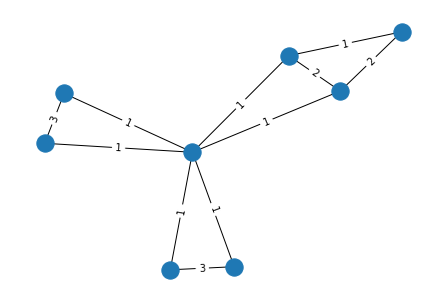

In [63]:
P = projected_graph()
labels = nx.get_edge_attributes(P,'weight')
pos = nx.spring_layout(P)
nx.draw(P, pos)
nx.draw_networkx_edge_labels(P,pos, edge_labels=labels)


,from,to,weight
0,Frida,Pablo,{'weight': 2}
1,Frida,Andy,{'weight': 1}
2,Frida,Vincent,{'weight': 2}
3,Claude,Georgia,{'weight': 3}
4,Claude,Andy,{'weight': 1}
5,Joan,Andy,{'weight': 1}
6,Joan,Lee,{'weight': 3}
7,Lee,Andy,{'weight': 1}
8,Pablo,Andy,{'weight': 1}
9,Pablo,Vincent,{'weight': 1}


## **Question 4:**

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using DataFrame.corr() ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

This function should return a float.

In [139]:
def correlation():
    P = projected_graph()
    edgelist = nx.convert.to_edgelist(P)
    df = pd.DataFrame(edgelist, columns= ['from', 'to', 'weight'])
    df['weight'] = df['weight'].apply(lambda x:int(x['weight']))
    df_copy = df.copy()
    df_copy.rename({'from':'to','to':'from', 'weight':'weight'}, axis = 1, inplace = True)
    df_concat = pd.concat([df,df_copy])
    df = pd.merge(df_concat,df_relationships,on=['from','to'], how = 'right')
    df.fillna(value = 0, inplace = True)
    return df.corr()



In [140]:
correlation()

,weight,score
weight,1.000000,0.788396
score,0.788396,1.000000
